In [23]:
import pandas as pd

pd.set_option('max_colwidth', 250)
pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)

df = pd.read_csv('data/home-depot.csv', nrows=10000)

In [24]:
df.head()

,search_term,product_uid,product_title,product_description,relevance
0,angle bracket,100001,Simpson Strong-Tie 12-Gauge Angle,"Not only do angles make joints stronger, they also provide more consistent, straight corners. Simpson Strong-Tie offers a wide variety of angles in various sizes and thicknesses to handle light-duty jobs or projects where a structural connection ...",3.00
1,l bracket,100001,Simpson Strong-Tie 12-Gauge Angle,"Not only do angles make joints stronger, they also provide more consistent, straight corners. Simpson Strong-Tie offers a wide variety of angles in various sizes and thicknesses to handle light-duty jobs or projects where a structural connection ...",2.50
2,deck over,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 Tugboat Wood and Concrete Coating,"BEHR Premium Textured DECKOVER is an innovative solid color coating. It will bring your old, weathered wood or concrete back to life. The advanced 100% acrylic resin formula creates a durable coating for your tired and worn out deck, rejuvenating...",3.00
3,rain shower head,100005,Delta Vero 1-Handle Shower Only Faucet Trim Kit in Chrome (Valve Not Included),"Update your bathroom with the Delta Vero Single-Handle Shower Faucet Trim Kit in Chrome. It has a sleek, modern and minimalistic aesthetic. The MultiChoice universal valve keeps the water temperature within +/-3 degrees Fahrenheit to help prevent...",2.33
4,shower only faucet,100005,Delta Vero 1-Handle Shower Only Faucet Trim Kit in Chrome (Valve Not Included),"Update your bathroom with the Delta Vero Single-Handle Shower Faucet Trim Kit in Chrome. It has a sleek, modern and minimalistic aesthetic. The MultiChoice universal valve keeps the water temperature within +/-3 degrees Fahrenheit to help prevent...",2.67


In [25]:
df.sort_values(by=['search_term', 'relevance'], ascending=True).head()

,search_term,product_uid,product_title,product_description,relevance
881,$ hole saw,100490,Milwaukee Metal Hole Saw Kit (15-Piece),"The Milwaukee Hole Dozer Bi-Metal Hole Saw features Rip Guard, the strongest tooth form in the industry, backed by the Rip Guard Limited Lifetime Tooth Break Warranty. Each tooth is built with more steel behind the cutting edge for added strength...",3.00
1341,$ hole saw,100712,Milwaukee 4 in. Bi-Metal Hole Saw,Use the Milwaukee 4 in. Bi-Metal Hole Saw to cut holes in a variety of materials. The steel hole saw can drill almost 2 in. deep. Milwaukee Ice Hardened products utilize a proprietary cryogenic hardening process that improves upon traditional hea...,3.00
5124,. exterior floor stain,102836,BEHR Premium 1-gal. #902 Slate Gray 1-Part Epoxy Concrete and Garage Floor Paint,"The BEHR Premium 1-Part Epoxy is a high-performance, ready-to-use, water-based floor paint that resists hot tire pick-up and marring. The finish is highly resistant to chemicals, oil and gasoline, which reduces the need for maintenance of hard-to...",2.33
4121,. exterior floor stain,102253,Glidden Porch and Floor 1-gal. Gloss Polyurethane Oil Paint,"Glidden 1-gal. Gloss Porch and Floor Polyurethane Oil Paint provides a durable gloss finish that withstands the demands of foot traffic and adds a beautiful, lasting look to interior and exterior wood and concrete floors, stairs, boat decks, maso...",3.00
5889,.110 wire connector,103297,Ideal Twister Wire Connectors 341 Tan (100 per Package)_x000D_,"The Twister is the industry's premier wire connector and easily handles the most common wiring configurations for residential construction projects. The durable polypropylene shell expands for progressive tightening, a feature that ensures depend...",2.00


In [26]:
df['product_title_and_description'] = df['product_title'] + ' ' + df['product_description']

In [27]:
df.drop(['product_uid', 'product_title', 'product_description'], axis=1, inplace=True)

In [28]:
df.sort_values(by=['search_term', 'relevance'], ascending=True).head()

,search_term,relevance,product_title_and_description
881,$ hole saw,3.00,"Milwaukee Metal Hole Saw Kit (15-Piece) The Milwaukee Hole Dozer Bi-Metal Hole Saw features Rip Guard, the strongest tooth form in the industry, backed by the Rip Guard Limited Lifetime Tooth Break Warranty. Each tooth is built with more steel be..."
1341,$ hole saw,3.00,Milwaukee 4 in. Bi-Metal Hole Saw Use the Milwaukee 4 in. Bi-Metal Hole Saw to cut holes in a variety of materials. The steel hole saw can drill almost 2 in. deep. Milwaukee Ice Hardened products utilize a proprietary cryogenic hardening process ...
5124,. exterior floor stain,2.33,"BEHR Premium 1-gal. #902 Slate Gray 1-Part Epoxy Concrete and Garage Floor Paint The BEHR Premium 1-Part Epoxy is a high-performance, ready-to-use, water-based floor paint that resists hot tire pick-up and marring. The finish is highly resistant ..."
4121,. exterior floor stain,3.00,"Glidden Porch and Floor 1-gal. Gloss Polyurethane Oil Paint Glidden 1-gal. Gloss Porch and Floor Polyurethane Oil Paint provides a durable gloss finish that withstands the demands of foot traffic and adds a beautiful, lasting look to interior and..."
5889,.110 wire connector,2.00,Ideal Twister Wire Connectors 341 Tan (100 per Package)_x000D_ The Twister is the industry's premier wire connector and easily handles the most common wiring configurations for residential construction projects. The durable polypropylene shell ex...


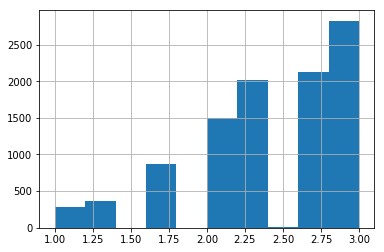

In [30]:
%matplotlib inline
df['relevance'].hist()

In [31]:
df.shape

(10000, 3)

In [32]:
#relations = []
#
#for idx, row in df.iterrows():
#    relations.append([
#        round(row['relevance']),
#        search_term_ids[row['search_term']],
#        product_ids[row['product_title_and_description']]
#    ])

In [62]:
targets = df['relevance'].values

In [34]:
from gensim.parsing.preprocessing import preprocess_documents
from gensim.corpora import Dictionary

queries_preprocessed = preprocess_documents(df['search_term'].values)
products_preprocessed = preprocess_documents(df['product_title_and_description'].values)

dictionary = Dictionary([['NONEXISTANT']] + queries_preprocessed + products_preprocessed)

dictionary.filter_extremes(no_below=5, no_above=0.2)

queries_preprocessed = [dictionary.doc2idx(x, unknown_word_index=0) for x in queries_preprocessed]
products_preprocessed = [dictionary.doc2idx(x, unknown_word_index=0) for x in products_preprocessed]

In [35]:
len(dictionary)

8521

In [63]:
queries_preprocessed = [query for query, product in zip(queries_preprocessed, products_preprocessed)
                        if len(query) and len(product)]
products_preprocessed = [product for query, product in zip(queries_preprocessed, products_preprocessed)
                         if len(query) and len(product)]
targets = [target for target, query, product in zip(targets, queries_preprocessed, products_preprocessed)
                         if len(query) and len(product)]

In [37]:
# https://github.com/faneshion/MatchZoo

## Borrowed from MatchZoo

In [38]:
from keras.layers import Input
from keras import backend as K
from keras.engine.topology import Layer
import numpy as np

class DynamicMaxPooling(Layer):
    def __init__(self, psize1, psize2, **kwargs):
        self.psize1 = psize1
        self.psize2 = psize2
        super(DynamicMaxPooling, self).__init__(**kwargs)

    def build(self, input_shape):
        input_shape_one = input_shape[0]
        self.msize1 = input_shape_one[1]
        self.msize2 = input_shape_one[2]
        super(DynamicMaxPooling, self).build(input_shape)  # Be sure to call this somewhere!

    def call(self, data):
        x, dpool_index = data
        x_expand = K.tf.gather_nd(x, dpool_index)
        x_pool = K.tf.nn.max_pool(x_expand, 
                    [1, self.msize1 / self.psize1, self.msize2 / self.psize2, 1], 
                    [1, self.msize1 / self.psize1, self.msize2 / self.psize2, 1], 
                    "VALID")
        return x_pool

    def compute_output_shape(self, input_shape):
        input_shape_one = input_shape[0]
        return (None, self.psize1, self.psize2, input_shape_one[3])

In [68]:
from keras.models import Sequential, Model
from keras.layers import *
from keras.layers import Reshape, Embedding, Merge, Dot
from keras.optimizers import Adam

query_maxlen = 10
product_maxlen = 200

query = Input(name='query', shape=(query_maxlen,))
doc = Input(name='doc', shape=(product_maxlen,))
dpool_index = Input(name='dpool_index', shape=[query_maxlen, product_maxlen, 3], dtype='int32')

embedding = Embedding(len(dictionary), 50, trainable=True)
q_embed = embedding(query)
d_embed = embedding(doc)

cross = Dot(axes=[2, 2], normalize=False)([q_embed, d_embed])
cross_reshape = Reshape((query_maxlen, product_maxlen, 1))(cross)

conv1 = Conv2D(32, [3,3], padding='same', activation='relu')(cross_reshape)
pool1 = DynamicMaxPooling(3, 10)([conv1, dpool_index])
pool1_flat = Flatten()(pool1)
pool1_flat_drop = Dropout(rate=0.4)(pool1_flat)
out = Dense(1)(pool1_flat_drop)

model = Model(inputs=[query, doc, dpool_index], outputs=out)

TypeError: object of type 'NoneType' has no len()

In [42]:
from keras.preprocessing.sequence import pad_sequences

query_lengths = [min(query_maxlen, len(query)) for query in queries_preprocessed]
product_lengths = [min(product_maxlen, len(product)) for product in products_preprocessed]

query_seqs = pad_sequences(queries_preprocessed, query_maxlen, padding='post', truncating='post')
product_seqs = pad_sequences(products_preprocessed, product_maxlen, padding='post', truncating='post')

In [64]:
from sklearn.model_selection import train_test_split

query_lengths, query_lengths_val, query_seqs, query_seqs_val, product_lengths, product_lengths_val, product_seqs, product_seqs_val, targets, targets_val = \
    train_test_split(query_lengths, query_seqs, product_lengths, product_seqs, targets, test_size=0.2, shuffle=False)

In [65]:
def dpool_index(batch_idx, len1_one, len2_one, max_len1, max_len2):
    stride1 = 1.0 * max_len1 / len1_one
    stride2 = 1.0 * max_len2 / len2_one
    idx1_one = [int(i/stride1) for i in range(max_len1)]
    idx2_one = [int(i/stride2) for i in range(max_len2)]
    mesh1, mesh2 = np.meshgrid(idx1_one, idx2_one)
    index_one = np.transpose(np.stack([np.ones(mesh1.shape) * batch_idx, mesh1, mesh2]), (2,1,0))
    return index_one

In [66]:
dpool_indices = np.array([
    dpool_index(i, q_len, p_len, query_maxlen, product_maxlen)
    for i, q_len, p_len in zip(range(len(query_lengths)), query_lengths, product_lengths)
])

dpool_indices_val = np.array([
    dpool_index(i, q_len, p_len, query_maxlen, product_maxlen)
    for i, q_len, p_len in zip(range(len(query_lengths_val)), query_lengths_val, product_lengths_val)
])

In [67]:
import gc

df = None
dictionary = None
query_lengths = None
product_lengths = None

gc.collect()

1101

In [33]:
#query_seqs.shape

In [34]:
#product_seqs.shape

In [35]:
#dpool_indices.shape

In [32]:
#len(targets)

In [60]:
import tensorflow as tf

def rank_hinge_loss(y_true, y_pred):
    y_pos = Lambda(lambda a: a[::2, :], output_shape= (1,))(y_pred)
    y_neg = Lambda(lambda a: a[1::2, :], output_shape= (1,))(y_pred)
    loss = K.maximum(0., 1.0 + y_neg - y_pos)
    return K.mean(loss)

def rank_crossentropy_loss(y_true, y_pred):
    neg_num = 1
    y_pos_logits = Lambda(lambda a: a[::(neg_num+1), :], output_shape= (1,))(y_pred)
    y_pos_labels = Lambda(lambda a: a[::(neg_num+1), :], output_shape= (1,))(y_true)
    logits_list, labels_list = [y_pos_logits], [y_pos_labels]
    for i in range(neg_num):
        y_neg_logits = Lambda(lambda a: a[(i+1)::(neg_num+1), :], output_shape= (1,))(y_pred)
        y_neg_labels = Lambda(lambda a: a[(i+1)::(neg_num+1), :], output_shape= (1,))(y_true)
        logits_list.append(y_neg_logits)
        labels_list.append(y_neg_labels)
    logits = tf.concat(logits_list, axis=1)
    labels = tf.concat(labels_list, axis=1)
    return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=logits))

model.compile(optimizer='adam', loss='categorical_hinge')
#model.compile(optimizer='adam', loss=rank_hinge_loss)

In [21]:
model.fit(x=[query_seqs, product_seqs, dpool_indices], y=targets, 
          validation_data=([query_seqs_val, product_seqs_val, dpool_indices_val], targets_val),
          batch_size=len(query_seqs), epochs=15)

Train on 7914 samples, validate on 1979 samples
Epoch 1/15
7914/7914 [==============================] - 8s 988us/step - loss: 1.0241 - val_loss: 0.9889
Epoch 2/15
7914/7914 [==============================] - 7s 837us/step - loss: 0.9874 - val_loss: 0.9548
Epoch 3/15
7914/7914 [==============================] - 6s 784us/step - loss: 0.9562 - val_loss: 0.9244
Epoch 4/15
7914/7914 [==============================] - 6s 794us/step - loss: 0.9276 - val_loss: 0.8945
Epoch 5/15
7914/7914 [==============================] - 7s 825us/step - loss: 0.8994 - val_loss: 0.8633
Epoch 6/15
7914/7914 [==============================] - 6s 810us/step - loss: 0.8693 - val_loss: 0.8292
Epoch 7/15
7914/7914 [==============================] - 6s 808us/step - loss: 0.8355 - val_loss: 0.7913
Epoch 8/15
7914/7914 [==============================] - 6s 805us/step - loss: 0.7986 - val_loss: 0.7493
Epoch 9/15
7914/7914 [==============================] - 7s 906us/step - loss: 0.7577 - val_loss: 0.7027
Epoch 10/15
7914

In [58]:
df[df['search_term'] == '20v dewalt kombo']

,search_term,relevance,product_title_and_description
352,20v dewalt kombo,1.67,"DEWALT 20-Volt 3Ah Max Lithium-Ion Battery (2-Pack) DEWALT delivers huge value with this two-pack, priced only marginally higher than a single device. These lithium-ion batteries are compatible with all tools in the DEWALT 20-Volt Max product lin..."
4223,20v dewalt kombo,3.00,DEWALT 20-Volt Max Lithium-Ion Cordless Combo Kit (2-Tool) The DEWALT DCK240C2 Combo Kit is versatile enough to handle most drilling and driving applications. This kit includes a DEWALT DCD771 1/2 in. Drill/Driver and a DCF885 1/4 in. Impact Driv...
4401,20v dewalt kombo,3.00,"DEWALT 20-Volt MAX Lithium-Ion Cordless Combo Kit with Tough Case (3-Tool) The DEWALT DCKTS386D2 is ideal for most drilling, hammering, driving and lighting applications. This value filled combo kit includes a hammer drill, impact driver, work li..."
5860,20v dewalt kombo,2.67,"DEWALT Max Fit Screwdriving Set (30-Piece) Securely fasten a variety of flathead, Phillips and Torx screws with this 30-piece MaxFit Screw Lock Set from DEWALT. It includes a magnetic screw lock sleeve so you won't drop any fasteners, and a bit t..."
7550,20v dewalt kombo,3.00,DEWALT 20-Volt Max (3Ah) Lithium-Ion Hammer Drill and Impact Combo Kit (2-Tool) DEWALT's new 20-Volt Max Power Tools are designed to surpass professional's expectations and address the need for tools that have the power to withstand rigorous jobs...


In [59]:
example_indices = df.index[df['search_term'] == '20v dewalt kombo'].tolist()
example_indices

[352, 4223, 4401, 5860, 7550]

In [55]:
query_lengths_example = [query_lengths[x] for x in example_indices]
product_lengths_example = [product_lengths[x] for x in example_indices]

query_seqs_example = np.array([query_seqs[x] for x in example_indices])
product_seqs_example = np.array([product_seqs[x] for x in example_indices])

targets_example = [targets[x] for x in example_indices]

In [56]:
dpool_indices_example = np.array([
    dpool_index(i, q_len, p_len, query_maxlen, product_maxlen)
    for i, q_len, p_len in zip(range(len(query_lengths_example)), query_lengths_example, product_lengths_example)
])

In [57]:
model.predict(x=[query_seqs_example, product_seqs_example, dpool_indices_example], batch_size=len(query_seqs_example))

array([[-0.00274162],
       [-0.00560461],
       [-0.00296127],
       [-0.00512522],
       [-0.00612148]], dtype=float32)